In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Đọc dữ liệu
file_path = "data/10kmau2004.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9188 non-null   int64  
 1   dantoc           9188 non-null   int64  
 2   tsnguoi          9188 non-null   int64  
 3   thunhap          9188 non-null   float64
 4   chitieu          9188 non-null   float64
 5   chichonangluong  9188 non-null   float64
 6   chitiendien      9188 non-null   int64  
 7   dienticho        9177 non-null   object 
 8   chatluongo       9188 non-null   int64  
 9   tiepcandienluoi  9188 non-null   int64  
 10  chitiendienbq    9188 non-null   float64
 11  thunhapbq        9188 non-null   float64
 12  chinangluongbq   9188 non-null   float64
 13  chitieubq        9188 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1005.1+ KB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,4,469900.0,96466.0,4920.0,2400,100,3,1,600.000000,117475.0000,1230.00,24116.50000
1,0,1,4,412790.0,30257.0,3847.0,4000,160,4,1,1000.000000,103197.5000,961.75,7564.25000
2,0,1,1,102205.0,7619.0,1203.0,480,108,3,1,480.000000,102205.0000,1203.00,7619.00000
3,1,1,3,302510.0,102535.0,6762.0,1040,50,4,1,346.666667,100836.6666,2254.00,34178.33333
4,1,1,5,483274.0,156023.5,5484.0,7800,64,3,1,1560.000000,96654.8000,1096.80,31204.70000


In [5]:
# Kiểm tra số lượng giá trị thiếu
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

# Xử lý cột 'dienticho': chuyển thành số, loại bỏ giá trị không hợp lệ
df['dienticho'] = pd.to_numeric(df['dienticho'], errors='coerce')

# Điền giá trị thiếu trong 'dienticho' bằng trung vị
df['dienticho'].fillna(df['dienticho'].median(), inplace=True)

# Kiểm tra lại dữ liệu sau khi xử lý
df.info()

Số lượng giá trị thiếu trong từng cột:
 ttnt                0
dantoc              0
tsnguoi             0
thunhap             0
chitieu             0
chichonangluong     0
chitiendien         0
dienticho          11
chatluongo          0
tiepcandienluoi     0
chitiendienbq       0
thunhapbq           0
chinangluongbq      0
chitieubq           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9188 non-null   int64  
 1   dantoc           9188 non-null   int64  
 2   tsnguoi          9188 non-null   int64  
 3   thunhap          9188 non-null   float64
 4   chitieu          9188 non-null   float64
 5   chichonangluong  9188 non-null   float64
 6   chitiendien      9188 non-null   int64  
 7   dienticho        9188 non-null   float64
 8   chatluongo       9188 non-null   int64  
 9   tiepcandienluoi  9188

C:\Users\84388\AppData\Local\Temp\ipykernel_11876\3472952472.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dienticho'].fillna(df['dienticho'].median(), inplace=True)


In [7]:
df.describe()

,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
count,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000
mean,0.244885,0.847192,4.401175,26353.903690,19821.722573,2014.955050,498.299630,60.161406,1.092077,0.922181,126.568838,6411.588703,485.691987,4825.702935
std,0.430042,0.359822,1.731368,25581.475701,15491.321978,1884.356635,636.804085,35.360369,0.847210,0.267901,172.905986,6360.526117,461.059704,3896.082522
min,0.000000,0.000000,1.000000,681.000000,700.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,602.000000,18.500000,611.142857
25%,0.000000,1.000000,3.000000,12311.250000,10399.000000,853.000000,180.000000,40.000000,1.000000,1.000000,45.000000,3006.000000,211.150000,2562.575000
50%,0.000000,1.000000,4.000000,19558.500000,15695.500000,1448.000000,360.000000,50.000000,1.000000,1.000000,83.333333,4711.208300,343.673300,3719.844445
75%,0.000000,1.000000,5.000000,31790.750000,24225.375000,2526.000000,600.000000,72.000000,1.000000,1.000000,150.000000,7552.200000,605.000000,5767.562500
max,1.000000,1.000000,20.000000,483274.000000,243650.000000,30224.000000,12000.000000,600.000000,4.000000,1.000000,4500.000000,117475.000000,9416.000000,73923.500000


In [9]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.161758,0.200000,1.0,0.133333,0.128917,0.972287,1.000000,0.157895,1.0,1.0,0.166667
1,0.126213,0.333333,1.0,0.222222,0.100372,0.853947,0.877837,0.157895,0.0,1.0,0.266667
2,0.038626,0.040000,1.0,0.106667,0.126044,0.210372,0.869345,0.000000,0.0,1.0,0.180000
3,0.222778,0.086667,1.0,0.077037,0.237882,0.625432,0.857637,0.105263,1.0,1.0,0.083333
4,0.180442,0.650000,1.0,0.346667,0.114743,1.000000,0.821856,0.210526,1.0,1.0,0.106667


In [11]:

pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


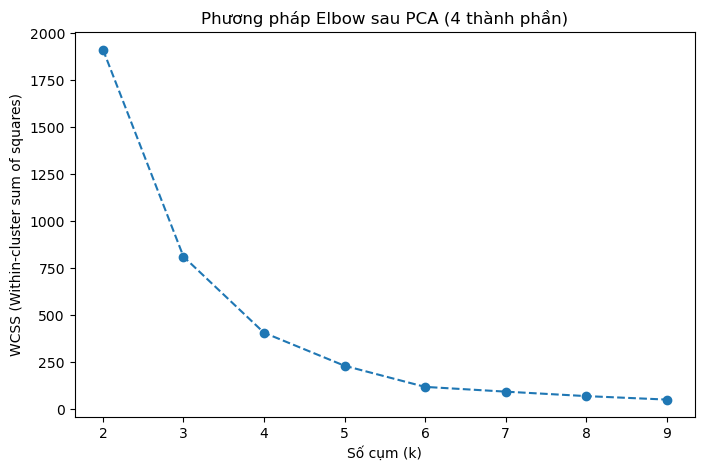

In [13]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

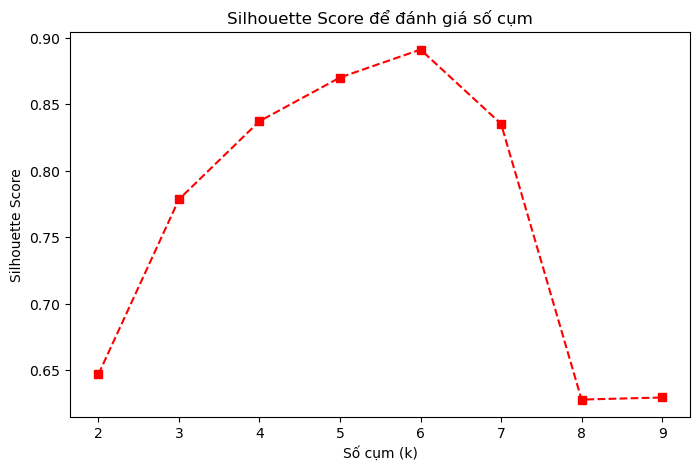

In [14]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [15]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    5665
1    2246
2    1277
Name: count, dtype: int64


In [17]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                1652.234263   380.674846         0.942454      96.372965   
1                3307.165138   988.910508         0.991541     255.359331   
2                1351.297572   157.212999         0.710258      34.005154   

             chinangluongbq       thunhap     thunhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                   
0                399.252595  23016.157529   5641.548238  4.260371  0.000000   
1                824.181433  40477.317765  10142.801437  4.222173  1.000000   
2                273.814039  16320.343774   3265.132505  5.340642  0.003132   

               dantoc  dienticho  
Cluster_PCA                       
0            1.000000  57.141748  
1            0.943455  67.981300  
2            0.000000  59.803446  


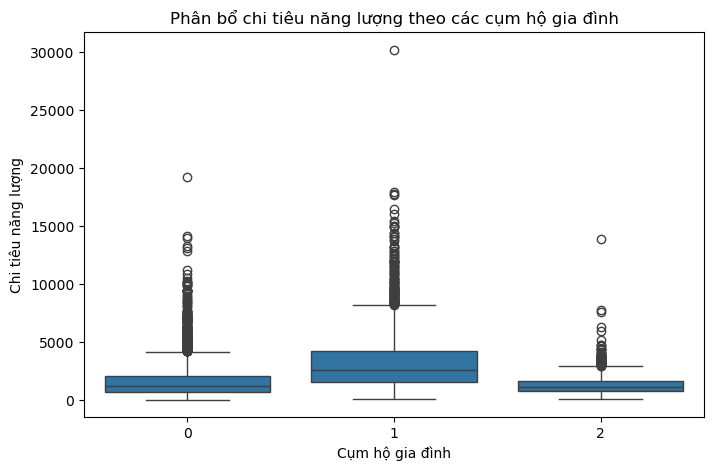

In [25]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster_PCA', y='chichonangluong')
plt.title("Phân bổ chi tiêu năng lượng theo các cụm hộ gia đình")
plt.xlabel("Cụm hộ gia đình")
plt.ylabel("Chi tiêu năng lượng")
plt.show()

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    5665
1    2246
2    1277
Name: count, dtype: int64


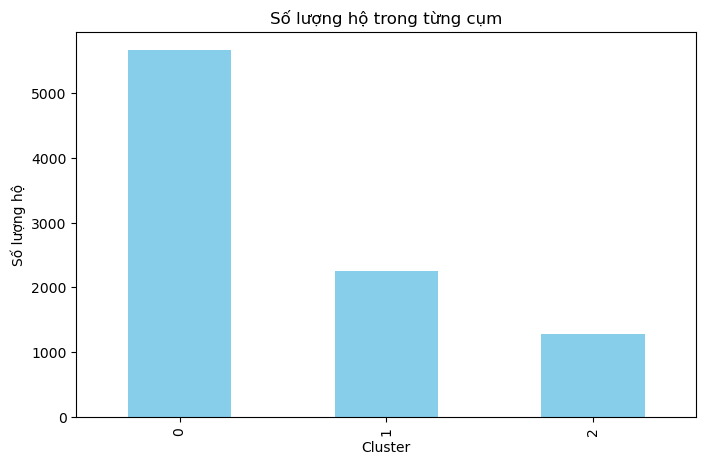

In [27]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                  thunhap     thunhapbq       chitieu    chitieubq
Cluster_PCA                                                       
0            23016.157529   5641.548238  17144.773698  4198.834833
1            40477.317765  10142.801437  30215.043232  7623.758614
2            16320.343774   3265.132505  13417.272435  2685.354260


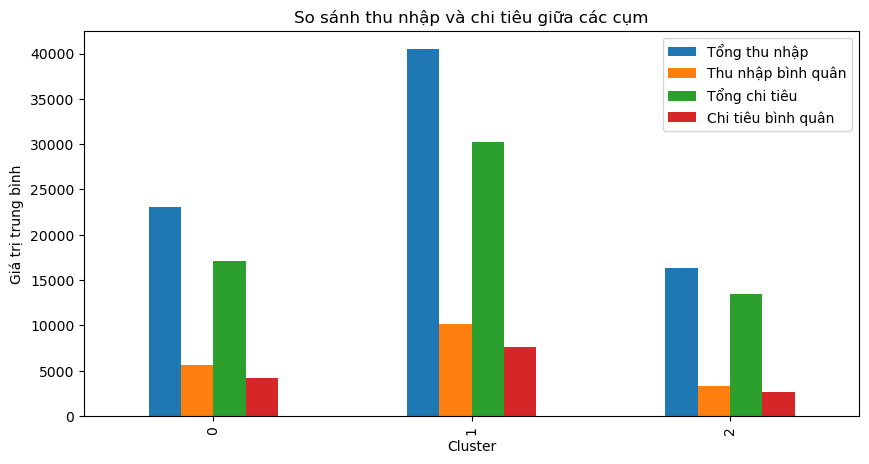

In [29]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                1652.234263      399.252595   380.674846      96.372965
1                3307.165138      824.181433   988.910508     255.359331
2                1351.297572      273.814039   157.212999      34.005154


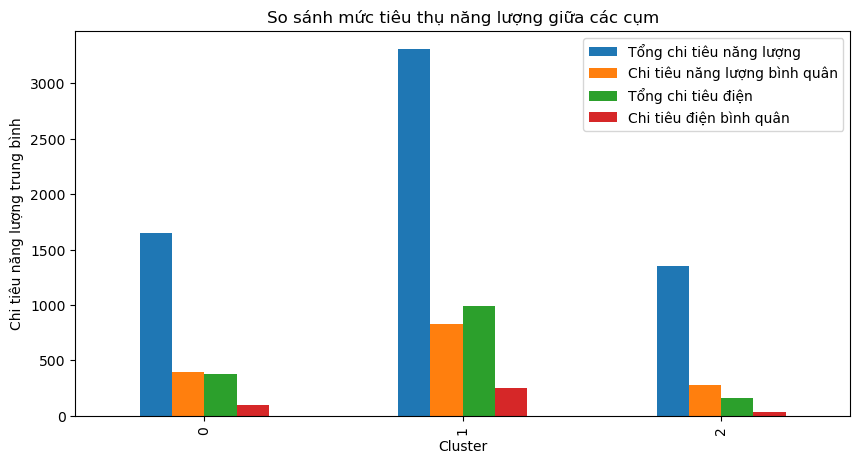

In [31]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    94.245366
1    99.154052
2    71.025842
Name: tiepcandienluoi, dtype: float64


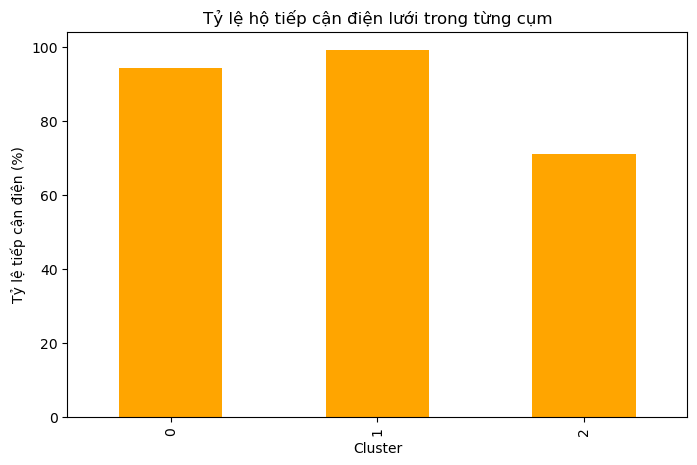

In [33]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0      0.000000
1      5.654497
2    100.000000
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.000000
1      0.000000
2     99.686766
Name: ttnt, dtype: float64


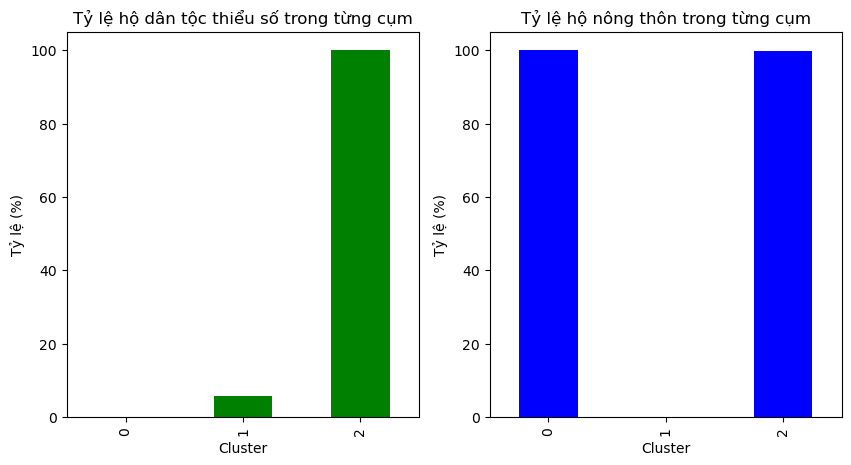

In [35]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            4.260371  57.141748
1            4.222173  67.981300
2            5.340642  59.803446


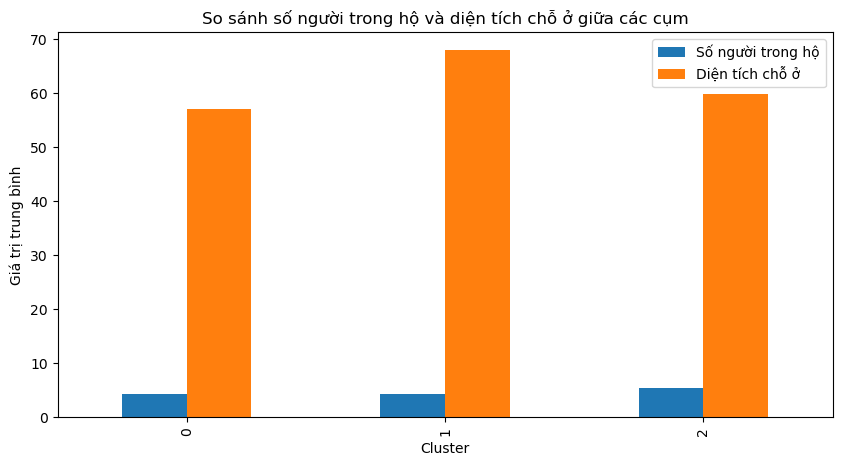

In [37]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()